<a href="https://colab.research.google.com/github/PRANAVTURLAPATI/Data-Visualization-Projects-with-Python-Libraries/blob/main/Oversampling_and_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Logistic Regression - Univariate Classification I
 
 2. Logistic Regression - Decision Boundary

 3. Logistic Regression - Multiclass Classification I

 4. Logistic Regression - Multiclass Classification II
 

 

----

### Problem Statement

In this project, you are going to create your synthetic data for multiclass classification, synthesize the data for training, and create a Random Forest Classification model and a Logistic Regression model to classify the data using Machine Learning. Conclude the project by comparing the models and their results.


---

### List of Activities

**Activity 1:** Create the Dummy Dataset

**Activity 2:**  Dataset Inspection

**Activity 3:**  Train-Test Split

**Activity 4:** Apply SMOTE

**Activity 5:** Random Forest Classification - Model Training

**Activity 6:** Random Forest Classification - Model Prediction and Evaluation (Testing Set)

**Activity 7:** Logistic Regression - Model Training

**Activity 8:** Logistic Regression - Model Prediction and Evaluation (Testing Set)


---

#### Activity 1: Create the Dummy Dataset

In this activity, you have to create a dummy dataset for multiclass classification.

The steps to be followed are as follows: 

**1.** Create a dummy dataset having two columns representing two independent variables and a third column representing the target.  

  The number of records should be divided into 6 random groups like `[500, 2270, 1900, 41, 2121, 272]` such that the target columns has 6 different labels `[0, 1, 2, 3, 4, 5]`. 


  **Recall:**

  To create a dummy data-frame, use the `make_blob()` function of the `sklearn.datasets` module which will return two arrays `feature_array` and the `target_array`. The syntax for the `make_blob()` function is as follows:

  **Syntax:** `make_blobs(n_samples, centers, n_features, random_state, cluster_std)`



In [ ]:
# Instruction to remove warning messages
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Create two arrays using the 'make_blobs()' function and store them in the 'features_array' and 'target_array' variables.
import numpy as np
from sklearn.datasets import make_blobs
features_array, target_array = make_blobs(n_samples = [500, 2270, 1900, 41, 2121, 272], n_features = 2, random_state = 42, cluster_std = 1)
#make_blobs(n_samples = 1000, n_centers = 4,...) ----> 4 row groups of 250 rows each, (250, 250, 250, 250)

**Hint:**

In the `make_blobs()` function use `n_samples=[500, 2270, 1900, 41, 2121, 272]` and `center=None` for the division of target label into seven groups.

----
**2.** Print the object-type of the arrays created by the `make_blob()` function and also print the number of rows and columns in them:

In [ ]:
# Find out the object-type of the arrays created by the 'make_blob()' function and the number of rows and columns in them.
# Print the type of 'features_array' and 'target_array'
print(type(features_array))
# Print the number of rows and column of 'features_array'
print(features_array.shape)
# Print the number of rows and column of 'target_array'
print(target_array.shape)

<class 'numpy.ndarray'>
(7104, 2)
(7104,)


**Q:** How many rows are created in the feature and target columns?

**A:** 7104, 2

----
**3.** Create a DataFrame from the two arrays using a Python dictionary.

**Steps: (Learned in "Logistic Regression - Decision Boundary" lesson**)
- Create a dummy dictionary.

- Add the feature columns as keys `col 1`, `col 2`, and target column as the `target`.

- Add the values from the feature and target columns one by one respectively in the dictionary using List Comprehension.

- Convert the dictionary into a DataFrame

- Print the first five rows of the DataFrame.

In [ ]:
# Create a Pandas DataFrame containing the items from the 'features_array' and 'target_array' arrays.
# Import the module
import pandas as pd
# Create a dummy dictionary
df_dict = {'feature1' : [features_array[i][0] for i in range(features_array.shape[0])], 'feature2' : [features_array[i][1] for i in range(features_array.shape[0])], 'target_array' : target_array}
# Convert the dictionary into DataFrame
df = pd.DataFrame.from_dict(df_dict)
# Print first five rows of the DataFrame
print(df.head())

   feature1  feature2  target_array
0  4.110901  0.916612             1
1 -6.456119 -8.484815             2
2  4.823713  4.666203             1
3 -6.440477 -6.046930             2
4  1.395249  5.368955             4


**Hint:**

Use function `from_dict()` to convert Python Dictionary to DataFrame.

**Syntax:** `pd.DataFrame.from_dict(some_dictionary)`

**After this activity, the DataFrame should be created with two independent features columns and one dependent target column.**

----

#### Activity 2: Dataset Inspection

In this activity, you have to look into the distribution of the labels in the `target` column of the DataFrame.

**1.** Print the number of occurrences of each label in the `target` column:

In [ ]:
# Display the number of occurrences of each label in the 'target' column.
df['target_array'].value_counts()

1    2270
4    2121
2    1900
0     500
5     272
3      41
Name: target_array, dtype: int64

**2.** Print the percentage of the samples for each label in the `target` column:

In [ ]:
# Get the percentage of count of each label samples in the dataset.
df['target_array'].value_counts(normalize = True) * 100

1    31.953829
4    29.856419
2    26.745495
0     7.038288
5     3.828829
3     0.577140
Name: target_array, dtype: float64

**Q:** How many unique labels are present in the DataFrame? What are they?

**A:** 6 labels, 1, 4, 2, 0, 5, 3

**Q:** Is the DataFrame balanced?

**A:** no

---



**3.**  Create a scatter plot between the columns `col 1` and `col 2` for all the labels to visualize the clusters of every label (or points):

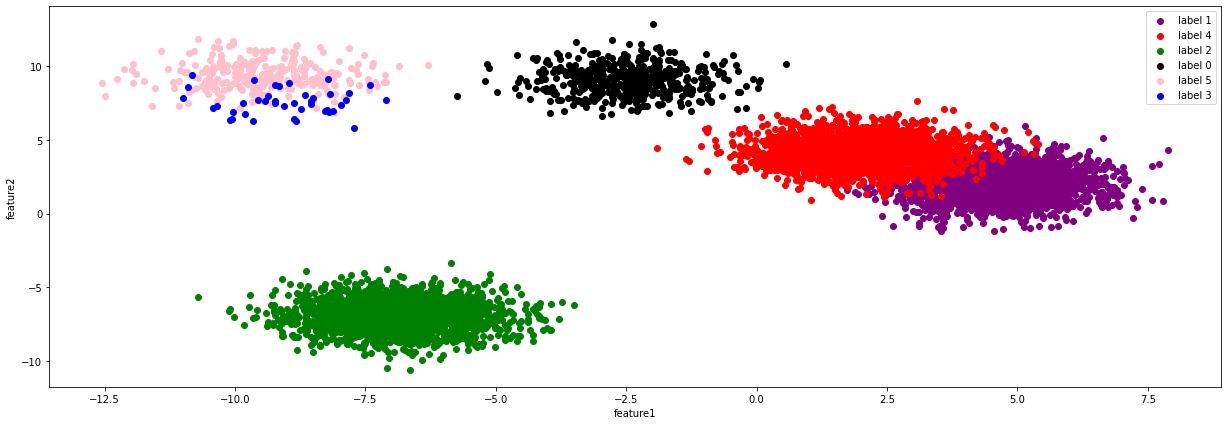

In [ ]:
# Create a scatter plot between 'col 1' and 'col 2' columns separately for all the labels in the same plot.
# Import the module
import matplotlib.pyplot as plt
color_list = ['black', 'purple', 'green', 'blue', 'red', 'pink']
# Define the size of the graph
plt.figure(figsize = (21, 7))
# Create a for loop executing for every unique label in the `target` column.
for i in list(df['target_array'].value_counts().index):
  # Plot the scatter plot for 'col 1' and 'col 2' where 'target ==i"
  plt.scatter(df.loc[df['target_array'] == i, 'feature1'], df.loc[df['target_array'] == i, 'feature2'], color = color_list[i], label = f"label {i}")
# Plot the x and y lables
plt.xlabel('feature1')
plt.ylabel('feature2')
# Display the legends and the graph
plt.legend()
plt.show()

**Hint:**
Revise the lesson "Logistic Regression - Decision Boundary".

**After this activity, the labels to be predicted that is the target variables and their distribution should be known.**

----

#### Activity 3: Train-Test Split
 
We need to predict the value of the `target` variable, using other variables. Thus, the `target` is the dependent variable and other columns are the independent variables.
 
**1.** Split the dataset into the training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

**2.** Set `random_state = 42`.

In [ ]:
# Import 'train_test_split' module
from sklearn.model_selection import train_test_split
# Create the features data frame holding all the columns except the last column 
# and print first five rows of this dataframe
features_df = df.iloc[:, :-1]
print(features_df.head())
# Create the target series that holds last column 'target'
# and print first five rows of this series
target_df = df.iloc[:, -1]
print(target_df.head())
# Split the train and test sets using the 'train_test_split()' function.
x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, random_state = 42, test_size = 0.30)

   feature1  feature2
0  4.110901  0.916612
1 -6.456119 -8.484815
2  4.823713  4.666203
3 -6.440477 -6.046930
4  1.395249  5.368955
0    1
1    2
2    1
3    2
4    4
Name: target_array, dtype: int64


**3.** Print the number of rows and columns in the training and testing set:

In [ ]:
# Print the shape of all the four variables i.e. 'X_train', 'X_test', 'y_train' and 'y_test'
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (4972, 2)
Shape of x_test: (2132, 2)
Shape of y_train: (4972,)
Shape of y_test: (2132,)


**After this activity, the features and target data should be split into training and testing data.**

----

#### Activity 4: Apply SMOTE

In this activity, if the data is imbalanced, oversample the data for the minority classes in the following way:

1. Create an object for the SMOTE using `SMOTE()` function.
2. Synthesize the data for the minority class using `fit_sample()` function by passing the feature and target training variable. 
3. Save the output of the above step, artificial data, in the new feature and target training variables.

In [ ]:
# Write the code to apply oversample the data.
# Import the 'SMOTE' module from the 'imblearn.over_sampling' library.
from imblearn.over_sampling import SMOTE
# Call the 'SMOTE()' function and store it in the a variable.
Object = SMOTE(sampling_strategy = 'all', random_state = 42)
# Call the 'fit_sample()' function.
x_train_resampled, y_train_resampled = Object.fit_resample(x_train, y_train)

Print the number of rows and columns in the original and artificial feature and target data:

In [ ]:
# Print the number of rows and columns in the original and  resampled data.
print(f"Shape of x_train. (original feature): {x_train.shape}")
print(f"Shape of x_train_resampled (artificial feature): {x_train_resampled.shape}")
print(f"Shape of y_train (original target): {y_train.shape}")
print(f"Shape of y_train_resampled (artificial target): {y_train_resampled.shape}")

Shape of x_train. (original feature): (4972, 2)
Shape of x_train_resampled (artificial feature): (9510, 2)
Shape of y_train (original target): (4972,)
Shape of y_train_resampled (artificial target): (9510,)


**Q:** How many rows and columns are there in the original features data?

**A:** 2345,2 and 2345,0 

**Q:** How many rows and columns are there in the artificially generated features data?

**A:** 4584,2 and 4584,0

----
Print the number of occurrences of labels in the artificially generated target data:

In [ ]:
# Display the number of occurrences of each label in the artificially target data.
y_train_resampled.value_counts(normalize = True)

5    0.166667
4    0.166667
3    0.166667
2    0.166667
1    0.166667
0    0.166667
Name: target_array, dtype: float64

**Q.** Are the number of occurrances equal for all the labels?

**A** yes

**After this activity, the training feature and target data should have the synthetic data such that all the labels have equal occurrances and the data is balanced**

----

#### Activity 5: Random Forest Classification - Model Training 

Implement Random Forest Classification using `sklearn` module in the following way:

1. Deploy the model by importing the `RandomForestClassifier` class and create an object of this class.
2. Call the `fit()` function using the Random Forest Classifier object and print score using the `score()` function using the object created.


In [ ]:
# Import the required modules from the 'sklearn.ensemble' and 'sklearn.metrics' libraries
from sklearn.ensemble import RandomForestClassifier
# Train the Random Forest Classifier
Object2 = RandomForestClassifier()
Object2.fit(x_train, y_train)
Object2.score(x_train, y_train)

**Q:** What is the accuracy score?

**A:** 1.0

**Q:** Is it 100%?

**A:** yes

**After this activity, a Random Forest Classification model object should be trained for multiclass classification.**

---

#### Activity 6: Random Forest Classification - Model Prediction and Evaluation (Testing Set)

**1.** Predict the values for the testing set by calling the `predict()` function on the Random Forest Classifier object. 

**2.** Print the unique labels predicted using Random Forest Regression on training features.

**3.** Print the distribution of the labels predicted in the predicted target series for the testing features.


In [ ]:
# Make predictions using Random Forest Classifier model object
# Make predictions on the test dataset by using the 'predict()' function.
rf_y_predicted = pd.Series(Object2.predict(x_test))
# Check the count of records classified under each label
print(f"count of records classified under each label {rf_y_predicted.value_counts()}\n")
# Print the distribution labels in the predicted series for testing features
print(f"the distribution labels in the predicted series for testing features {rf_y_predicted.describe()}\n")
# Print the unique labels in the predicted series for testing features
print(f"unique labels in the predicted series for testing features {rf_y_predicted.unique()}")

**Q:** Are all the label values predicted for the testing features data?

**A:** no
$$ $$
**Q:** Which labels are predicted and not predicted by the Random Forest Classification model?

**A:** 1

---
**4.** Display the confusion matrix for the testing set:


In [ ]:
# Print the confusion matrix for the actual and predicted data of the test set (if required)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, rf_y_predicted))

**5.** Visualize the confusion matrix using the heatmap:

In [ ]:
# Create the heatmap for the confusion matrix 
# import the module
import seaborn as sns
# Create a series of all unique labels in actual target data
unique_series = pd.Series(df['target_array'].unique())
# Create a Pandas DataFrame object for the confusion matrix created above labelled with the classes.
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, rf_y_predicted), columns = unique_series)
print(f"{confusion_matrix_df}\n")
# Create a heatmap for the confusion matrix.
plt.figure(figsize = (21, 7))
sns.heatmap(confusion_matrix(y_test, rf_y_predicted), fmt = 'd')
plt.show()

**Note:** Use `fmt='d'` as one of the parameters in the `heatmap()` to display the values in plain notation.

**Q.** Explain the heat map output in short based on the number of positive and negative outcomes for each class?

**A** 

---
**6.** Display the classification report for the test set:

In [ ]:
# Print the classification report for the actual and predicted data of the testing set (if required)
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_y_predicted))

**Q** Which classes were identified correctly without any misclassification?

**A** 0 and 2

**Q** Which class has the lowest f1-score?

**A** 3

**After this activity, labels should be predicted for the target columns using the test features set and the Random Forest Classifier model should be evaluated for the same.**

---

#### Activity 7: Logistic Regression - Model Training 

Implement Logistic Regression Classification using `sklearn` module in the following way:

1. Deploy the model by importing the `LogisticRegression` class and create an object of this class.
2. Call the `fit()` function on the Logistic Regression object and print the score using the `score()` function.


In [ ]:
# Build a logistic regression model using the 'sklearn' module.
from sklearn.linear_model import LogisticRegression
# 1. First, call the 'LogisticRegression' module and store it in 'lg_clg' variable.
lg_clg = LogisticRegression()
# 2. Call the 'fit()' function with 'X_train' and 'y_train' as inputs.
lg_clg.fit(x_train, y_train)
# 3. Call the 'score()' function with 'X_train' and 'y_train' as inputs to check the accuracy score of the model.
lg_clg.score(x_train, y_train)

**Q:** What is the accuracy score?

**A:** 0.9748592115848753

**Q:** Is it 100%?

**A:** No

**After this activity, a Logistic Regression model object should be trained for multiclass classification.**

----

#### Activity 8: Logistic Regression - Model Prediction and Evaluation (Testing Set)

**1.** Predict the values for the test set by calling the `predict()` function on the Logistic Regression object.

**2.** Print the unique labels predicted using Logistic Regression on test features.

**3.** Print the distribution of the labels predicted in the predicted target series for the test features.


In [ ]:
# Predict the values of 'target' by the logistic regression model on the test set.
# Predict the target for the test features data
lg_clg_y_predicted = lg_clg.predict(x_test)
# Convert the predicted array into series
lg_clg_y_predicted_series = pd.Series(lg_clg_y_predicted)
# Print the unique labels in the predicted series for test features
print(lg_clg_y_predicted_series.unique())
# Print the distribution labels in the predicted series for test features
print(lg_clg_y_predicted_series.describe())

**Q:** Are all the labels predicted for the test features data?

**A:** 

$$ $$
**Q:** What are labels predicted and not predicted using Logistic Regression model object?

**A:** 

---
**4.** Display the confusion matrix for the test set:


In [ ]:
# Print the confusion matrix for the actual and predicted data of the test set (if required)
print(confusion_matrix(y_test, lg_clg_y_predicted))

**5.** Visualize the confusion matrix using the heatmap:

In [ ]:
# Create the heatmap for the confusion matrix generated by Logistic Regression testing predictions
# Create a Pandas DataFrame object for the confusion matrix created above labelled with the classes.
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, rf_y_predicted), columns = unique_series)
print(f"{confusion_matrix_df}\n")
# Create a heatmap for the confusion matrix.
plt.figure(figsize = (21, 7))
sns.heatmap(confusion_matrix(y_test, lg_clg_y_predicted), fmt = 'd')
plt.show()

**6.** Display the classification report for the test set:

In [ ]:
# Print the classification report for the actual and predicted data of the testing set (if required)
print(classification_report(y_test, lg_clg_y_predicted))

**Q** Which classes were identified correctly without any misclassification?

**A** 

**Q** Which class has the lowest f1-score?

**A** 

**After this activity, labels should be predicted for the target columns using the test features set and the Logistic Regression model should be evaluated for the same.**

---

**Write your interpretation of the results here.**

- Interpretation 1: 


- Interpretation 2: 

---